In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style="ticks", color_codes=True)
import matplotlib.gridspec as gridspec
from scipy import stats, integrate
from scipy.optimize import curve_fit
#import uncertainties.unumpy as unp
#import uncertainties as unc
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import ConstantKernel, RBF
from pandas import DataFrame
from sklearn import linear_model
import statsmodels.api as sm
from pandas import DataFrame
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
!git clone https://github.com/abigailmechtenberg/APS-PRPER-ExD.git

Cloning into 'APS-PRPER-ExD'...
remote: Enumerating objects: 318, done.
remote: Counting objects: 100% (205/205), done.
remote: Compressing objects: 100% (152/152), done.
remote: Total 318 (delta 107), reused 137 (delta 53), pack-reused 113 (from 1)
Receiving objects: 100% (318/318), 31.98 MiB | 22.28 MiB/s, done.
Resolving deltas: 100% (145/145), done.


In [3]:
%cd APS-PRPER-ExD

/content/APS-PRPER-ExD


In [4]:
!git pull

Already up to date.


In [5]:
from pathlib import Path

path_to_colab = Path("/content/APS-PRPER-ExD")

In [6]:
# Data includes Class (C), lab Section (S),
# Student Group submitting lab reports (Grp), and Lab TA who wrote comment (TA),
# C+S+Grp is Lab Report Comments by Class, Student, and Group
# C+S+TA is Lab Report Comments by Class, Student, and Lab TA
# Lab Report number (Labnum),
# Word Count of a specific lab report comment (Word Count),
# Tone of a specific lab report comment (Tone),
# Complexity of a specific lab report comment (Complexity),
# Probative of a specific lab report comment (Probative),
# Judging versus Advising evaluation of a specific lab report comment by a Lab TA (JATA)
# CIF is for students' lab course instructor feedback at institution
# FE-Exam is for Physics Lab 1 students' lab final exam (Physics 2 did an extensive
# final lab project and no lab final exam)

data_group1_df = pd.read_excel(path_to_colab / 'Paper_1/data_group1.xlsx', header = 0,sheet_name = 'Sheet1')
data_group1_np = data_group1_df.to_numpy()

# print(data_group1_df.head()) # delete comment to see data
# print(data_group1_np)        # delete comment to see data

data_group2_df = pd.read_excel(path_to_colab / 'Paper_1/data_group2.xlsx', header = 0,sheet_name = 'Sheet1')
data_group2_np = data_group2_df.to_numpy()
#print(data_group2_df)

# print(data_group2_df.head())  # delete comment to see data
# print(data_group2_np)         # delete comment to see data

data_group3_df = pd.read_excel(path_to_colab / 'Paper_1/data_group3.xlsx', header = 0,sheet_name = 'Sheet1')
data_group3_np = data_group3_df.to_numpy()

# print(data_group3_df.head())  # delete comment to see data
# print(data_group3_np)         # delete comment to see data

data_group4_df = pd.read_excel(path_to_colab / 'Paper_1/data_group4.xlsx', header = 0,sheet_name = 'Sheet1')
data_group4_np = data_group4_df.to_numpy()

#print(data_group4_df)

      C+S+TA  Word Count  Tone  Probative  Complexity  JATA
0        111        0.87  0.25          1         1.0     1
1        111        0.51  0.50          1         1.0     1
2        111        0.44  0.50          1         1.0     1
3        111        0.36  0.50          1         1.0     1
4        111        0.85  0.50          1         1.0     1
...      ...         ...   ...        ...         ...   ...
8716     282        0.04  0.50          1         0.2     0
8717     282        0.02  0.00          0         0.2     0
8718     282        0.04  0.50          0         0.2     0
8719     282        0.04  0.50          0         0.2     0
8720     282        0.02  1.00          0         0.2     0

[8721 rows x 6 columns]


In [7]:
df_grouping_by_TA = data_group4_df.groupby('C+S+TA').mean()
df_grouping_by_TA_count = data_group4_df.groupby('C+S+TA').count()
#count_df = df_grouping_by_TA_count
#df_grouping_by_TA['Count'] = count_df['Complexity']/count_df['Complexity'].max()

### Get the features data
data = df_grouping_by_TA
features = list(data.columns)
data = data[features]
print(data)

        Word Count      Tone  Probative  Complexity      JATA
C+S+TA                                                       
111       0.235409  0.395178   0.696017    0.631866  0.540881
112       0.301744  0.524160   0.859244    0.653782  0.680672
113       0.219065  0.466706   0.827103    0.609813  0.595794
121       0.259939  0.427321   0.920852    0.617352  0.648402
122       0.158105  0.496417   0.590764    0.515287  0.391720
131       0.164221  0.444805   0.850649    0.553247  0.454545
132       0.181298  0.458015   0.923664    0.586260  0.442748
133       0.173217  0.491304   0.852174    0.561739  0.452174
211       0.151757  0.461149   0.777027    0.631081  0.358108
212       0.141797  0.381536   0.624183    0.575817  0.281046
221       0.117512  0.417464   0.770335    0.604785  0.220096
222       0.263774  0.362030   0.711278    0.674286  0.500752
231       0.279890  0.407369   0.742424    0.712397  0.438017
241       0.228707  0.376902   0.711957    0.643043  0.331522
242     

In [8]:
data.head()

,Word Count,Tone,Probative,Complexity,JATA
C+S+TA,,,,,
111,0.235409,0.395178,0.696017,0.631866,0.540881
112,0.301744,0.524160,0.859244,0.653782,0.680672
113,0.219065,0.466706,0.827103,0.609813,0.595794
121,0.259939,0.427321,0.920852,0.617352,0.648402
122,0.158105,0.496417,0.590764,0.515287,0.391720


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21 entries, 111 to 282
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Word Count  21 non-null     float64
 1   Tone        21 non-null     float64
 2   Probative   21 non-null     float64
 3   Complexity  21 non-null     float64
 4   JATA        21 non-null     float64
dtypes: float64(5)
memory usage: 1008.0 bytes


In [10]:
data.describe()

,Word Count,Tone,Probative,Complexity,JATA
count,21.000000,21.000000,21.000000,21.000000,21.000000
mean,0.202192,0.440653,0.785219,0.612268,0.366255
std,0.057697,0.044369,0.103595,0.053511,0.175858
min,0.117512,0.362030,0.590764,0.515287,0.063369
25%,0.158105,0.407369,0.711278,0.572537,0.213018
50%,0.191559,0.444805,0.770335,0.609813,0.391720
75%,0.235409,0.472794,0.859244,0.644082,0.454545
max,0.321388,0.524160,0.966942,0.712397,0.680672


In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

In [12]:
print(data)

        Word Count      Tone  Probative  Complexity      JATA
C+S+TA                                                       
111       0.235409  0.395178   0.696017    0.631866  0.540881
112       0.301744  0.524160   0.859244    0.653782  0.680672
113       0.219065  0.466706   0.827103    0.609813  0.595794
121       0.259939  0.427321   0.920852    0.617352  0.648402
122       0.158105  0.496417   0.590764    0.515287  0.391720
131       0.164221  0.444805   0.850649    0.553247  0.454545
132       0.181298  0.458015   0.923664    0.586260  0.442748
133       0.173217  0.491304   0.852174    0.561739  0.452174
211       0.151757  0.461149   0.777027    0.631081  0.358108
212       0.141797  0.381536   0.624183    0.575817  0.281046
221       0.117512  0.417464   0.770335    0.604785  0.220096
222       0.263774  0.362030   0.711278    0.674286  0.500752
231       0.279890  0.407369   0.742424    0.712397  0.438017
241       0.228707  0.376902   0.711957    0.643043  0.331522
242     

Cluster labels:    [1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0]
Cluster y_kmeans:  [1 1 1 1 0 1 1 1 0 0 0 1 1 0 0 0 0 0 1 0 0]
Inertia: 0.48757917576284293
Number of Iterations: 4
Number of Features: 5
Feature Names: ['Word Count' 'Tone' 'Probative' 'Complexity' 'JATA']



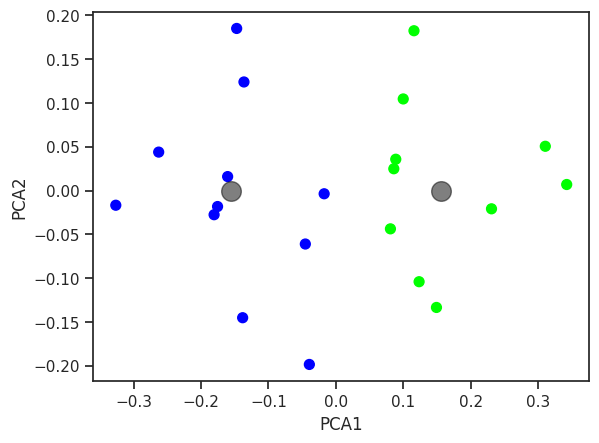

In [13]:
# Combining PCA and KMeans offers a robust approach to derive the complexities of large datasets.
# By first reducing dimensions with PCA and then applying KMeans, researchers can uncover subtle groupings and patterns that might be lost in the high-dimensional space.

n_clusters =2
pca_num_components = 2
random_state = 10

kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
kmeans = kmeans.fit(data)
y_kmeans = kmeans.predict(data)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
inertia = kmeans.inertia_
n_iterations = kmeans.n_iter_
n_features = kmeans.n_features_in_
feature_names = kmeans.feature_names_in_
print("Cluster labels:   ", labels)
print("Cluster y_kmeans: ", y_kmeans)
print("Inertia:", inertia)
print("Number of Iterations:", n_iterations)
print("Number of Features:", n_features)
print("Feature Names:", feature_names)
print("")

### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
results_pca = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
#print("Results_PCA:", results_pca)

results_x = results_pca['pca1'].to_numpy()
results_y = results_pca['pca2'].to_numpy()

centers_pca = PCA(n_components=pca_num_components).fit_transform(centers)
centers_pca = pd.DataFrame(centers_pca,columns=['pca1','pca2'])

centers_x = centers_pca['pca1'].to_numpy()
centers_y = centers_pca['pca2'].to_numpy()

# Create the scatter plot
fig, ax = plt.subplots()
ax.scatter(results_x , results_y, c=y_kmeans, s=50, cmap='brg')
ax.scatter(centers_x, centers_y, c='black', s=200, alpha=0.5)
#for i in range(len(results_x)):
#    ax.text(results_x[i], results_y[i], labels[i], ha='right', va='top')
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
#ax.set_xlim(-0.16,0.16)
#ax.set_ylim(-0.07,0.07)

plt.show()

Cluster labels:    [0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1]
Cluster y_kmeans:  [0 0 0 0 1 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 1]
Inertia: 0.36626901159766184
Number of Iterations: 4
Number of Features: 2
Feature Names: ['pca1' 'pca2']



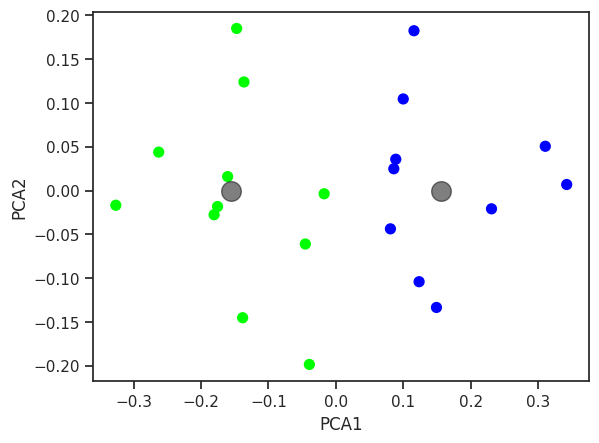

In [14]:
# Combining PCA and KMeans offers a robust approach to derive the complexities of large datasets.
# By first reducing dimensions with PCA and then applying KMeans, researchers can uncover subtle groupings and patterns that might be lost in the high-dimensional space.

n_clusters = 2
pca_num_components = 2
random_state = 0

### Run PCA on the data and reduce the dimensions in pca_num_components dimensions

reduced_data = PCA(n_components=pca_num_components).fit_transform(data)
results_pca = pd.DataFrame(reduced_data,columns=['pca1','pca2'])
#print("Results_PCA:", results_pca)

kmeans = KMeans(n_clusters=n_clusters)
kmeans = kmeans.fit(results_pca)
y_kmeans = kmeans.predict(results_pca)
labels = kmeans.labels_
centers = kmeans.cluster_centers_
inertia = kmeans.inertia_
n_iterations = kmeans.n_iter_
n_features = kmeans.n_features_in_
feature_names = kmeans.feature_names_in_
print("Cluster labels:   ", labels)
print("Cluster y_kmeans: ", y_kmeans)
print("Inertia:", inertia)
print("Number of Iterations:", n_iterations)
print("Number of Features:", n_features)
print("Feature Names:", feature_names)
print("")

results_x = results_pca['pca1'].to_numpy()
results_y = results_pca['pca2'].to_numpy()

centers_pca = PCA(n_components=pca_num_components).fit_transform(centers)
centers_pca = pd.DataFrame(centers_pca,columns=['pca1','pca2'])

centers_x = centers_pca['pca1'].to_numpy()
centers_y = centers_pca['pca2'].to_numpy()

# Create the scatter plot
fig, ax = plt.subplots()
ax.scatter(results_x , results_y, c=y_kmeans, s=50, cmap='brg')
ax.scatter(centers_x, centers_y, c='black', s=200, alpha=0.5)
#for i in range(len(results_x)):
#    ax.text(results_x[i], results_y[i], labels[i], ha='right', va='top')
ax.set_xlabel("PCA1")
ax.set_ylabel("PCA2")
#ax.set_xlim(-0.16,0.16)
#ax.set_ylim(-0.07,0.07)

plt.show()